In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load sound file (and sample rate)

pluck1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/FS/BS_1_EQ_1_FS_NO_1_10.wav')
pick1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/PK/BS_1_EQ_1_PK_NO_1_10.wav')
slap1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/ST/BS_1_EQ_1_ST_NO_1_10.wav')


In [3]:
# finds length of each signal array
maxlen = max((len(pluck1)), (len(pick1)), (len(slap1)))

# pads all signals to max length
pluck1_pad = np.pad(pluck1, (0, maxlen - len(pluck1)), 'constant', constant_values=0)
pick1_pad = np.pad(pick1, (0, maxlen - len(pick1)), 'constant', constant_values=0)
slap1_pad = np.pad(slap1, (0, maxlen - len(slap1)), 'constant', constant_values=0)

In [4]:
# Set up frame-size and hop-length

FS = 1024
HL = 512

In [5]:
# Extract spectral bandwidth

bw_pluck1 = librosa.feature.spectral_bandwidth(y=pluck1_pad, sr=sr, n_fft=FS, hop_length=HL)[0]  # adding [0] turns the array into one dimension, so we just recieve the...
bw_pick1 = librosa.feature.spectral_bandwidth(y=pick1_pad, sr=sr, n_fft=FS, hop_length=HL)[0]    # ...centroid value at each frame 
bw_slap1 = librosa.feature.spectral_bandwidth(y=slap1_pad, sr=sr, n_fft=FS, hop_length=HL)[0]

In [6]:
frames = range(len(bw_pluck1))
t = (librosa.frames_to_time(frames)) # calculates time from frames

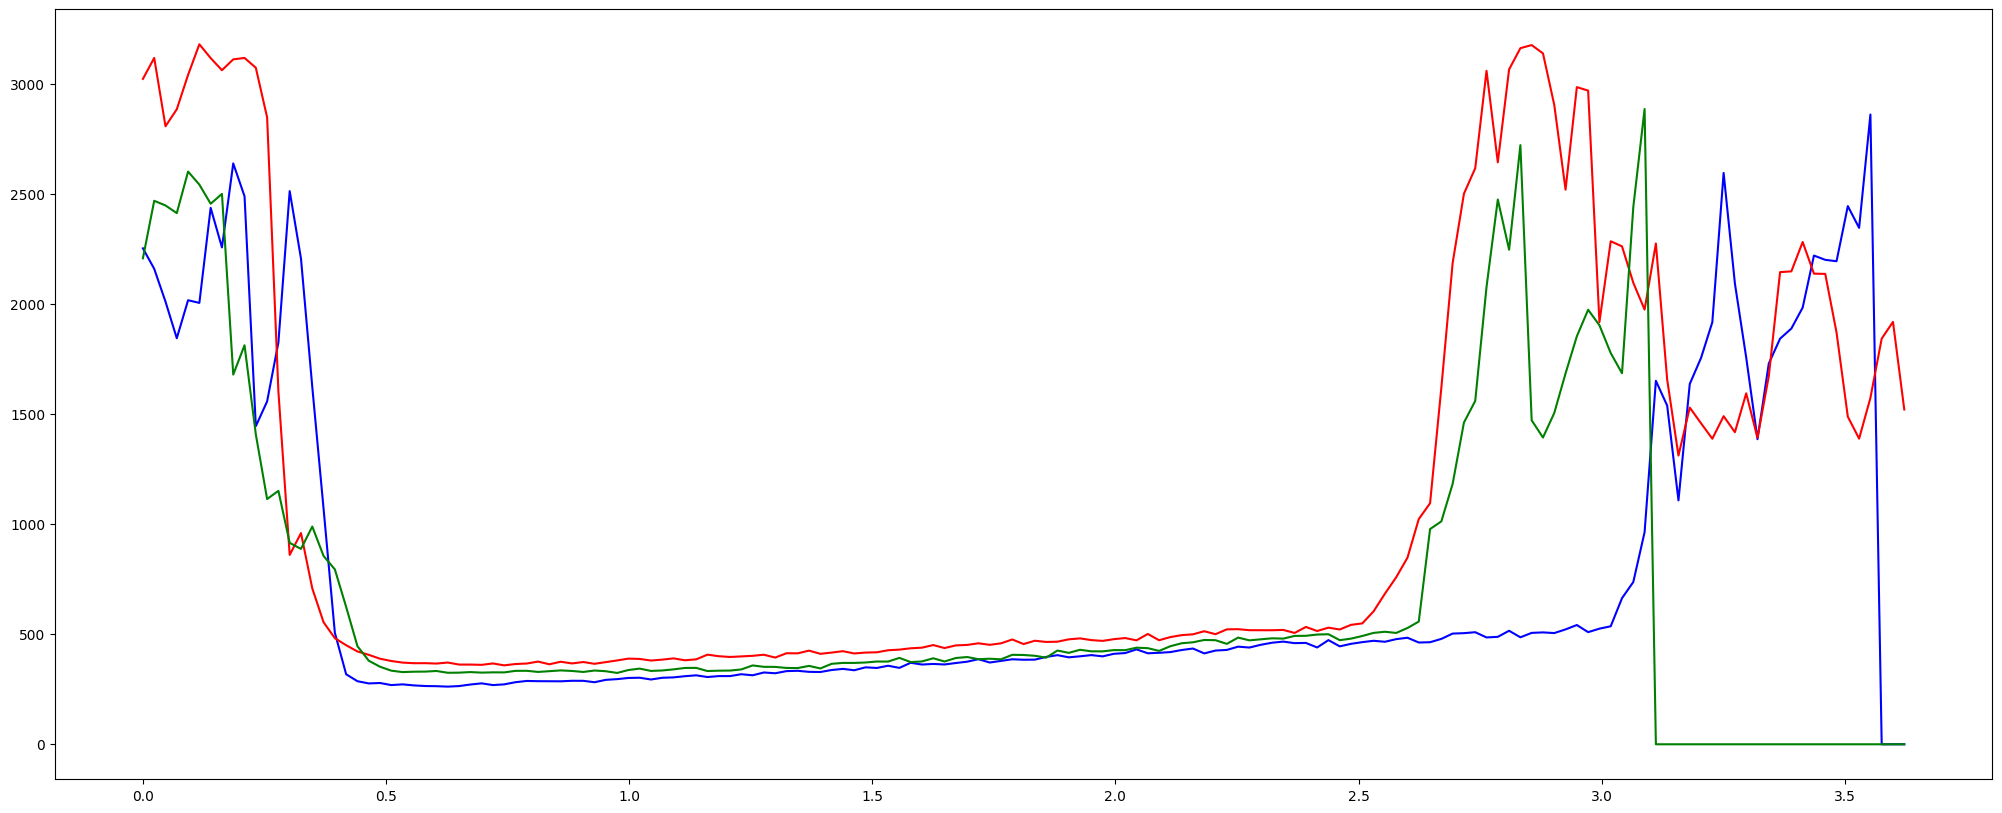

In [7]:
# Plot all three spectral bandwidth arrays on one graph

plt.figure(figsize=(25,10))

plt.plot(t, bw_pluck1, color='b')
plt.plot(t, bw_pick1, color='r')
plt.plot(t, bw_slap1, color='g')

plt.show()